# 1. MongoDB에 저장된 이미지 읽어서 리스트 저장
## : 강의자료 81~84페이지

In [1]:
from pymongo import MongoClient

In [2]:
# python_test database에 접속
db = MongoClient().python_test

In [3]:
# 데이터 전체 조회
# mongoDB야 테이블명이 fs.files(파일정보, 파일명, 크기) 전체조회
db.fs.files.find()

In [4]:
# 객체가 있는데 내용을 안보여주는 경우 list에 넣어보자
# 파일의 크기가 커서 chunks가 나뉘어 저장됨
# 파일의 정보
list (db.fs.files.find())

[{'_id': ObjectId('6090b44f12371f64185ea5e6'),
  'filename': 'IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg',
  'metadata': {'contentType': 'image/jpg', 'type': 'cat'},
  'chunkSize': 261120,
  'md5': '7119e67bf6b132668f1965e0d964b752',
  'length': 58564,
  'uploadDate': datetime.datetime(2021, 5, 4, 2, 41, 19, 951000)},
 {'_id': ObjectId('6090b44f12371f64185ea5e8'),
  'filename': 'I5moydFuUMwFi3oEOPX959RlIZqY.jpg',
  'metadata': {'contentType': 'image/jpg', 'type': 'cat'},
  'chunkSize': 261120,
  'md5': '4a7afd67b9e07465a226f4194f96446c',
  'length': 73356,
  'uploadDate': datetime.datetime(2021, 5, 4, 2, 41, 19, 976000)},
 {'_id': ObjectId('6090b45012371f64185ea5ea'),
  'filename': 'IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg',
  'metadata': {'contentType': 'image/jpg', 'type': 'cat'},
  'chunkSize': 261120,
  'md5': '577e61eaf420b3f355f8aedb82c42d29',
  'length': 18150410,
  'uploadDate': datetime.datetime(2021, 5, 4, 2, 41, 21, 87000)},
 {'_id': ObjectId('6090b45112371f64185ea631'),
  'filename': 'IEsKZx

In [5]:
# 실제 파일의 내용(chunk에 저장됨)을 가져오기
from gridfs import GridFS

In [6]:
fs = GridFS(db)

In [7]:
image_list = list (db.fs.files.find())

In [8]:
image_list

[{'_id': ObjectId('6090b44f12371f64185ea5e6'),
  'filename': 'IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg',
  'metadata': {'contentType': 'image/jpg', 'type': 'cat'},
  'chunkSize': 261120,
  'md5': '7119e67bf6b132668f1965e0d964b752',
  'length': 58564,
  'uploadDate': datetime.datetime(2021, 5, 4, 2, 41, 19, 951000)},
 {'_id': ObjectId('6090b44f12371f64185ea5e8'),
  'filename': 'I5moydFuUMwFi3oEOPX959RlIZqY.jpg',
  'metadata': {'contentType': 'image/jpg', 'type': 'cat'},
  'chunkSize': 261120,
  'md5': '4a7afd67b9e07465a226f4194f96446c',
  'length': 73356,
  'uploadDate': datetime.datetime(2021, 5, 4, 2, 41, 19, 976000)},
 {'_id': ObjectId('6090b45012371f64185ea5ea'),
  'filename': 'IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg',
  'metadata': {'contentType': 'image/jpg', 'type': 'cat'},
  'chunkSize': 261120,
  'md5': '577e61eaf420b3f355f8aedb82c42d29',
  'length': 18150410,
  'uploadDate': datetime.datetime(2021, 5, 4, 2, 41, 21, 87000)},
 {'_id': ObjectId('6090b45112371f64185ea631'),
  'filename': 'IEsKZx

In [9]:
#이미지의 가로 세로
IM_WIDTH = 200
IM_HEIGHT = 200

In [10]:
# Mongodb에서 이미지를 읽어서 저장할 리스트
images = []
# 고양이 이미지 1, 강아지 이미지 0을 저장할 리스트
labels = []

In [11]:
from PIL import Image
from io import BytesIO

In [12]:
import numpy as np

In [13]:
for file_detail in image_list : 
    # 파일명 조회
    file_name = file_detail["filename"]
    print("file_name: ", file_name)
    # 파일명이 일치하는 마지막 파일의 내용을 가져올 객체 f 리턴
    f = fs.get_last_version(filename = file_name)
    # 파일의 내용을 읽어서 data에 저장
    data = f.read()
    # 데이터가 없는 경우도 있음
    if len(data) > 0:
        # data의 내용을 이미지로 변환해서 im에 저장
        im = Image.open(BytesIO(data))
        # 컬러이미지를 흑백으로 변환 convert("L")
        im = im.convert('L')
        # 이미지 파일의 크기를 200x200으로 수정
        im = im.resize((IM_WIDTH, IM_HEIGHT))
        # 이미지 파일에 저장된 RGB값은 0~255사이의 값이 저장되어 있음
        # 255로 나눠서 값들을 0~1사이의 실수로 변환(더 정확하게 분석 가능)
        
        # 이미지를 2차원 배열로 변환 : np.array(im)
        # 2차원 배열을 1차원 배열로 변환 : .flatten()
        im = np.array(im).flatten() / 255.0
        # im에 저장된 데이터의 타입을 float32로 변환
        im = im.astype("float32")
        # images에 im을 추가
        images.append(im)
        # file_detail["metadata"]["type"]에 cat이 포함되어 있으면 1 아니면 0을 label에 저장
        label = 1 if "cat" in file_detail["metadata"]["type"] else 0
        # labels에 label추가
        labels.append(label)

file_name:  IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg
file_name:  I5moydFuUMwFi3oEOPX959RlIZqY.jpg
file_name:  IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg
file_name:  IEsKZxZsl_W-4jcOZ3RRpfDvVBKc.jpg
file_name:  I83NJ67RXsHAWWga9wDSmnhAfE98.jpg
file_name:  IG79sqb-FJtxWBSNtNymn1-QaJbc.jpg
file_name:  IpOX3MIQao76aQ5DO8uSEE3KqAvc.jpg
file_name:  mosaakTul0.jpeg
file_name:  IR3Ystm-qKc2kqBL3LHe-gfI_KLI.jpg
file_name:  IKAGAvCAUDkUL3Ed7_clw-dyRzXI.jpg
file_name:  0000109645_001_20210414160328325.jpg
file_name:  Iim65cm5HWXqjZXcxmSgqhWxFTNo.jpg
file_name:  I-A0r1LdiJ3yO6c6ldxnBShIDofo.jpg
file_name:  I1hoQJPcjdBUwaPKW-Mo7DKRTWKQ.jpg
file_name:  0000050851_001_20210207121759617.jpg
file_name:  InMPojw89TUVzGSOxu-cLdP4z9YE.jpg
file_name:  It2EXojHG65IVMKt3AUYXXvI8aCk.jpg
file_name:  IsCLLxO4nAmF8PZYz7qG1SDs5k6k.jpg
file_name:  I3zHrwehDjdZoKPssXEZcB82vo8Y.jpg
file_name:  IBjDo1mQMyU7UqQTWiTuA9O_1ZBw.jpg
file_name:  INH-dd7aSQJ8LMOJUSoLxN-cd30I.jpg
file_name:  0000100240_001_20210306160159601.png
file_name:  thu

C:\Users\Admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


file_name:  5a8fa361a54930af8a765b2679c88b9c.jpg
file_name:  609714_image_1_20210112170035640.jpg
file_name:  IGLsMME2tKiXe4D5vNZlfxDJPTHM.jpg
file_name:  IP4sawHDuGc-N7KIetB0qoQOm9vM.jpg
file_name:  Iqg1oclNNDLAXoksLZBxx3-DejKk.jpg
file_name:  57edb31e5872cce7c81cf901e4ade89a--cute-cats-adorable-animals.jpg
file_name:  I3nNx68qbA621Sy6Hv9KvnEkl-Xg.jpg
file_name:  I-7WLTcToNOuRlJKj7eBJEe5ol-c.jpg
file_name:  I3mkNPmGK5Q8-Ej0t3tStYpynm8Q.jpg
file_name:  10700860015938139_1604904605.jpg
file_name:  IUyEcUi9jYsSvAFbQpmseFdMatrU.jpg
file_name:  0000052909_004_20210316163002543.jpg
file_name:  IBvse4A08VxJXZn71hImUA6EFMyg.jpg
file_name:  0000041887_001_20200923084942888.jpg
file_name:  20461861653657302_2040364378.jpg
file_name:  15239924701988596_1945492768.jpg
file_name:  26529571884.20210326180434.jpg
file_name:  14191204345868055_1638250179.jpg
file_name:  4pg0m7s_202111694147318283.jpg
file_name:  25695172580.20210121221531.jpg
file_name:  131a55470e6c6ac47d92da0241ed34d2.JPG
file_name

file_name:  0000046589_001_20201116110222712.jpg
file_name:  56063771.2_59_20130623234402.jpg
file_name:  0000001050_002_20181204154505470.jpg
file_name:  IE001734949_STD_99_20140727152902.jpg
file_name:  eb78e2d1f9d7d3491fc6439326376e3b--bookshelves-himalayan-cat.jpg
file_name:  O1CN01vGqKPm1a0mw5q6s2E_3326773268.jpg
file_name:  IjpCq7LEjzjQuqgBPgN9ZFQJKGF0.jpg
file_name:  Isu-rnSJZkbmpEzyf_YCyjqsQ_c4.jpg
file_name:  24934519005.20201122022946.jpg
file_name:  Iko7C10Tq3oP9n-MTaE4fuyupUdc.jpg
file_name:  I-g_Mx0mkGa9RChQ4YHQpjrCnf_E.jpg
file_name:  IRtJm-vXmn-XCcBQlUlr5TwJryxg.jpg
file_name:  ISjoaLDBeON_cEXTaBZGtxVolxCk.jpg
file_name:  0000054553_002_20210414155142433.jpg
file_name:  IP8tMPJ4pzIV-5_V2LZ78aXzgF1s.jpg
file_name:  IrLrR5gRzpCsWUHvogxMa6bm7K8g.jpg
file_name:  Ib8PaX0koMG7rAs5pe4mTirWKu0M.jpg
file_name:  ILCKNnEnwXXO3HedfuFB_OCwlrqc.jpg
file_name:  InDSp1BOCDGsuTCYUvKfMJEmU-Uw.jpg
file_name:  mosaqQxZGu.jpeg
file_name:  0000133407_001_20210423135402161.jpg
file_name:  IxW4

file_name:  145c548d5db8121a7a5bfbbda0caee39--baby-cubs-off-of.jpg
file_name:  SSI_20130915144939_V_59_20130915145703.jpg
file_name:  mug_obj_137982593664254880.jpg
file_name:  1c24f57573970965184622dfa1471803.jpg
file_name:  IARwGTRep0z4AojdAe5qjcCrcM5E.jpg
file_name:  0000466150_001_20200821120027060.jpg
file_name:  6b9e243dc4b2f413dd461e5d4dbe33d2.jpg
file_name:  0000038582_001_20200826083904528.jpg
file_name:  Iz62ewy5AGHWInmMREMnTeC2GKRg.jpg
file_name:  I1gwRhC0nTBc4E5IYG1Z4X_CxxvQ.jpg
file_name:  INM4SMcJsyYofR854jMEyudcKsRw.jpg
file_name:  333015484f098ba76bdbd5c3f3c206b2.jpg
file_name:  NISI20081116_0000268013_web.jpg
file_name:  0000000273_002_20170904144451764.jpg
file_name:  IuJQ_zoxO6hNkw6xc602kE-hD_bk.jpg
file_name:  15daac1ee5687cf7596e2cb5170ae361--prettiest-cat-devon-rex-cats.jpg
file_name:  20161019_1697647_99_20161019153816.jpg
file_name:  I84MZ0WDyVJRa_SV3S5TVSENPfWk.jpg
file_name:  0000029657_001_20200602083611769.jpg
file_name:  nZfZFINuuKVB7rFp6ht3uHmoFjAqqZ5Vrsnp

file_name:  0000032610_001_20200703082630375.jpg
file_name:  b9f0705c1c227e0aef8a30a6e5f7eb0a--orange-kittens-white-kittens.jpg
file_name:  0000001110_001_20171221152550443.jpg
file_name:  0000003490_003_20181031174645695.jpg
file_name:  I5YV1hKdqMrkAX5QhX0PGhRnYBkc.jpg
file_name:  0000041175_001_20200917111907806.jpg
file_name:  0000039385_001_20200902075658055.jpg
file_name:  IHIqLkEafaFwZcElScUEhpLtATdM.jpg
file_name:  0000034436_001_20200722161635274.jpg
file_name:  11746254545845048_896367134.jpeg
file_name:  IMzZs-g-NI3lQj_42mhIeVUxpwCs.jpg
file_name:  36378ba7a41f1d1553940220c711675e--moustache-kitten.jpg
file_name:  20140729103941486010_59_20140729104603.jpg
file_name:  0000042358_001_20200926134533453.jpg
file_name:  0000003889_008_20181214174722262.jpg
file_name:  084ad6d1f8d39a0c10aca17362e0814a.jpg
file_name:  I-2xhJwCAQDAUB3s9V8uBBZ2B578.jpg
file_name:  3242e61bde3d421ba824499ed4863c01.JPG
file_name:  IMkjLOJH7i8445xQB_DdsSOfU74A.jpg
file_name:  182E543E4DA7875F1F91EE
file

file_name:  IP_q5t0uhfqupaTJx-r9Dvjst5As.jpg
file_name:  IJD5uJrUbM4NLz0Vj8nweB6NE4RE.jpg
file_name:  ISj9nw46m3S7ZWsUXXbBrc7VmOQo.jpg
file_name:  26529697071.20210326181525.jpg
file_name:  IitrvDGkDPcV9U4PIkmypUnLGSlQ.jpg
file_name:  11109_mainiamge3.jpg
file_name:  18935347259431695_204009600.jpg
file_name:  IUXuPla84ZMcJa7Zjlz18U407IOI.jpg
file_name:  0000049425_001_20210112110238865.jpg
file_name:  20170612172658795_img1.jpg
file_name:  0000051587_005_20210223100410329.jpg
file_name:  26434108522.20210320191336.jpg
file_name:  11837201666164945_1265509545.jpg
file_name:  19375243449639073_256724419.jpg
file_name:  16624441428895125_1487508902.jpg
file_name:  450_450_O1CN01kTUD972EhSUJKYaTu_2201411448776.jpg
file_name:  0000050156_003_20210125105040726.jpg
file_name:  0000050791_006_20210205140523504.jpg
file_name:  I2cyiD9_U5pcT6LAY2typv1smfOM.jpg
file_name:  25527394426.20210107214935.jpg
file_name:  16858431257449591_1875767868.jpg
file_name:  IpCcdJFkHQM7t58s7lPaK68jxTkg.jpg
fil

file_name:  0000025296_001_20200421133450259.jpg
file_name:  0000008847_001_20200112150618497.jpg
file_name:  It_Q7AGLGwOKe5U7UR54icXVOIbs.jpg
file_name:  0000001427_001_20190808185251758.jpg
file_name:  I5kzFTRfWTXxcPvwo6Rf-iD_a3V4.jpg
file_name:  115692_1.jpg
file_name:  50273fa3d83407bb076232957da6e734--cute-cats-funny-cats.jpg
file_name:  18067712004756786_724627714.jpg
file_name:  I56WVumxcN5fWMsAJh0daS6UAcKo.jpg
file_name:  mug_obj_140007965936566153.jpg
file_name:  0000039195_001_20200830112856555.jpg
file_name:  IC2KDgmyJippZ3iY2SftiKGoYSYA.jpg
file_name:  13401898365402242_397065510.jpg
file_name:  94e133b949ecc7a1e24190b0b3f0676d.jpg
file_name:  IndgnbQyLz2i7cKpkM9-RU2ExCv0.jpg
file_name:  It6Zr0o2duyEBiQBFqOLoRFqNolY.jpg
file_name:  12b0f777425e101c041025c1cef19d90.jpg
file_name:  IoNB1TxuziqQManUCbJV5S5DMM3s.jpg
file_name:  5e97e7eed07d929587ec0b888f738748--ginger-kitten-ginger-cats.jpg
file_name:  I661S6jezsyaM6KmzXP0xP329kH4.jpg
file_name:  I_aEE6mC8JdXbaz3A1B3pQId7UJ0.jp

file_name:  0000048184_005_20201215165526814.jpg
file_name:  ISqqDXLFi6-QvYf3QT5yn5u4cj3E.jpg
file_name:  0000009487_001_20200116090418994.jpg
file_name:  IW8ogHJMPjbznY4Dsf4ZT0bzVzfo.jpg
file_name:  Ic6Ah7vH_um3RjYMWfWiUVhdl_jo.jpg
file_name:  Ikax9xVyde7FGxwQa-HGCzhfxmUM.jpg
file_name:  IDnSwKS2VNP6U8S2gjHoeBIgS8Qo.jpg
file_name:  0000028309_001_20200518083405996.jpg
file_name:  0000043754_001_20201013145946686.jpg
file_name:  2012120117343412304_1_59_20121202101103.jpg
file_name:  mug_obj_139174552461334247.jpg
file_name:  IRCQIvGm8GSbGKCt1GRlV_P1cXNo.jpg
file_name:  0000037206_001_20200814113048195.jpg
file_name:  0000029731_001_20200602141614365.jpg
file_name:  IB8s51J1yJOLDQrqIn5geoI4-3Dk.jpg
file_name:  0000046492_001_20201114113101449.jpg
file_name:  0000035917_001_20200805083643561.jpg
file_name:  15273_detail_4166.jpg
file_name:  I3kmthLbOpD2GWXbkyDwqTdb3WoQ.jpg
file_name:  0000049638_001_20210116133521670.jpg
file_name:  0000017848_001_20200229144230071.jpg
file_name:  a654f

file_name:  IgGXCNg64RHwxcxaAu_kZMNEXHG4.jpg
file_name:  0000040885_001_20200915111712517.jpg
file_name:  0000050072_001_20210123141221107.jpg
file_name:  IJ3sZXLKdONhhD8XQJctbTkiieIA.jpg
file_name:  0000048324_001_20201217163815044.jpg
file_name:  mosa5geQbk.jpeg
file_name:  0000031885_008_20200624164826861.jpg
file_name:  I9XW_TsgbT_aYsjom_nRTJDFvh4k.jpg
file_name:  IX_3DKoRGrbz6iNLt7kE5TLurJ_M.jpg
file_name:  dd59c30c4bd17bae5313cc757339356f--baby-huskies-huskies-puppies.jpg
file_name:  0000050362_001_20210128163627554.jpg
file_name:  17963291004345549_1143707138.jpg
file_name:  47d4bb5b6b90157d82acbe283a12ed13--raincoat-the-rain.jpg
file_name:  I7Y0_kMeumJbqmkbk7MyKO3sOhZ0.jpg
file_name:  0000036154_001_20200806105445109.jpg
file_name:  ICCewdXJKQ0-cUu5-ClMuxYrrZ2o.jpg
file_name:  0000028539_001_20200521105404413.jpg
file_name:  0002883820_001_20200801203710391.png
file_name:  IeW7loIaLY_i_Q1crhVpgBNkpvfU.jpg
file_name:  10900455332137184_872580761.jpg
file_name:  31ccf650154b29e58

file_name:  13034754713007363_1580862111.jpg
file_name:  0000696251_001_20210331205006444.jpg
file_name:  0000051863_001_20210227114641081.jpg
file_name:  IRUFzTzq0_93IMJzf38ZkkUwlPeM.jpg
file_name:  13068697996134341_1785376466.jpg
file_name:  0000054320_001_20210410122812768.jpg
file_name:  7ed19a8ee445384ef88956663bc36e2c--springer-spaniel-puppies-spaniel-dog.jpg
file_name:  IQGhE_K9hcDsMElxbs_OcdlpU8-s.jpg
file_name:  0000053218_001_20210322140120940.jpg
file_name:  0000051723_001_20210226141953920.jpg
file_name:  0000051566_001_20210221112859185.jpg
file_name:  16324242685069083_835587459.jpg
file_name:  0000054943_001_20210420161817607.jpg
file_name:  I7srodbrZ47QVDWJJh97IQPD0vGg.jpg
file_name:  0000051092_001_20210211122018590.jpg
file_name:  0000052973_001_20210317151248549.jpg
file_name:  0000052123_001_20210304154247584.jpg
file_name:  0000050744_001_20210204155058518.jpg
file_name:  fae011d0265ed7f52dcf5f2d5f7b151b--doberman-love-doberman-pinscher.jpg
file_name:  18251723448

file_name:  0000033486_001_20200714163031592.jpg
file_name:  1e569d8aa06dae93dce9b4fccce6de94.jpg
file_name:  13926_detail_5682.jpg
file_name:  IPnNkUVp7KUsrIqs7KS_zpZ3n6V4.jpg
file_name:  0000031088_001_20200615173420172.jpg
file_name:  0000034584_001_20200723151837335.jpg
file_name:  ILUNZcSugURcEyY9JnfFzsXs_qpI.jpg
file_name:  0000019923_001_20200313085636431.jpg
file_name:  IC94FgwPp4UWa7MoYSCN6QQF8Luw.jpg
file_name:  0000029714_001_20200602094811657.jpg
file_name:  I9OGdLEqwQttjKuyygHbf8cwlVXU.jpg
file_name:  0000039653_001_20200904105500174.jpg
file_name:  0000036754_001_20200811144646822.jpg
file_name:  IHG41TE0y2pP8ujWhEv0GUMrhlYQ.jpg
file_name:  IRatW0-1WKZUAnx73zRN6EVLZ2qY.jpg
file_name:  0000037737_001_20200819111050321.jpg
file_name:  IhZspHG6j8tcUKXgbmJs6MFPzHhA.jpg
file_name:  40576_detail_97861525666958.jpg
file_name:  IcshfVgeEUAS3sEefD4UBbhQae3A.jpg
file_name:  0000026791_001_20200505104253893.jpg
file_name:  0000032472_001_20200630110428272.jpg
file_name:  0000028237_

file_name:  0000043614_001_20201010112905395.jpg
file_name:  In7tA7p3A5G-YzE6OLuOOdebaO2k.jpg
file_name:  IrCsYbIC7S1lGUwOxx_i0h4fVAlI.jpg
file_name:  47003_detail_06711534391727.jpg
file_name:  1d3bd368432632fe5e520ebc924aa9a6--smiling-dogs-big-dogs.jpg
file_name:  IFoNO3DG5jEWkkdcx8BQkkafA824.jpg
file_name:  3728_detail_87821519811367.jpg
file_name:  IH6MgSFR4S7ROiPTj-aX1CG629Gg.jpg
file_name:  Izngr5CWnWJjQqGYXwHdg7HpMfOA.jpg
file_name:  0000031654_001_20200621090019187.jpg
file_name:  I1QvoRzVldZiksTM_jSj_EF_q6UE.jpg
file_name:  9ab49aca73ba15ce280a80181e22b9f7--pug-puppies-pinterest.jpg
file_name:  InIkTqpOMKg9S9CorwDzJwx8zcYk.jpg
file_name:  IMtI0Ob7HRYZxu-ozwSsFcvI-Ips.jpg
file_name:  55b1d35bbac62e1627a15fd8636c6c33--irish-terrier-airedale-terrier.jpg
file_name:  IDvq-QADQLLFxVwAPb4_VCszZnOU.jpg
file_name:  202103101725556695902_20210310173257_02_20210310173619553.jpg
file_name:  59365_detail_96251569463208.jpg
file_name:  0000033030_001_20200708100030526.jpg
file_name:  53019_

# 2. 1을 numpy 배열로 변환 
## : 강의자료 86페이지

In [14]:
# 고양이와 강아지 이미지가 저장된 리스트 images를 배열로 변환해서 리턴
images_arr = np.array(images)
# 고양이 이미지 1 강아지 이미지 0이 저장된 labels를 배열로 변환하여 리턴
labels_arr = np.array(labels)

In [15]:
images_arr

array([[0.7137255 , 0.7176471 , 0.7137255 , ..., 0.5686275 , 0.5647059 ,
        0.56078434],
       [0.4117647 , 0.40784314, 0.41960785, ..., 0.7294118 , 0.7294118 ,
        0.7254902 ],
       [0.2784314 , 0.2627451 , 0.2509804 , ..., 0.2       , 0.2       ,
        0.21960784],
       ...,
       [0.7490196 , 0.7529412 , 0.74509805, ..., 0.6156863 , 0.5882353 ,
        0.5529412 ],
       [0.18431373, 0.20392157, 0.21176471, ..., 0.22352941, 0.21568628,
        0.21960784],
       [0.34901962, 0.34901962, 0.33333334, ..., 0.5411765 , 0.28627452,
        0.10196079]], dtype=float32)

In [16]:
#images_arr 배열의 모양을 조회
# 가로 200, 세로 200 RGB (3) 
# 인 이미지들이 저장되 있음
images_arr.shape

(1975, 40000)

In [17]:
labels_arr

array([1, 1, 1, ..., 0, 0, 0])

# 3. 학습데이터, 테스트데이터 분리 
## : 강의자료 87~89페이지

In [18]:
from sklearn.model_selection import train_test_split
# 학습데이터와 테스트데이터로 분리
# image_arr, labels_arr을 7.5 : 2.5로 분리
X_train, X_test, y_train, y_test = train_test_split(images_arr, labels_arr)

In [19]:
# 학습데이터 이미지 조회
X_train

array([[0.72156864, 0.7254902 , 0.7294118 , ..., 0.5176471 , 0.52156866,
        0.5176471 ],
       [0.5137255 , 0.5294118 , 0.65882355, ..., 0.21960784, 0.21568628,
        0.23137255],
       [1.        , 1.        , 1.        , ..., 0.6       , 0.60784316,
        0.58431375],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.7647059 , 0.99215686, 0.99607843, ..., 0.7254902 , 0.70980394,
        0.6901961 ],
       [0.44313726, 0.4509804 , 0.44313726, ..., 0.36862746, 0.3882353 ,
        0.38039216]], dtype=float32)

In [20]:
# 테스트 데이터 이미지 조회
X_test

array([[0.6117647 , 0.6156863 , 0.6156863 , ..., 0.7764706 , 0.76862746,
        0.7647059 ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.7490196 , 0.74509805, 0.7372549 , ..., 0.49019608, 0.49411765,
        0.49803922],
       ...,
       [0.5019608 , 0.45490196, 0.39607844, ..., 0.73333335, 0.7254902 ,
        0.7372549 ],
       [0.27058825, 0.27058825, 0.26666668, ..., 0.627451  , 0.61960787,
        0.6156863 ],
       [0.89411765, 0.9019608 , 0.8980392 , ..., 0.5137255 , 0.5686275 ,
        0.627451  ]], dtype=float32)

In [21]:
# 학습데잍의 분류 조회(고양이 1, 강아지 0)
y_train

array([1, 0, 1, ..., 0, 0, 0])

In [22]:
# 테스트 데이터의 분류 조회(고양이 1, 강아지 0)
y_test

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,

# 4. SVM을 이용한 예측
## : 강의자료 91~97페이지
### SVM :서포트 벡터 머신은 기계 학습의 분야 중 하나로 패턴 인식, 자료 분석을 위한 지도 학습 모델이며, 주로 분류와 회귀 분석을 위해 사용한다

In [23]:
from sklearn import svm

In [24]:
# X_train과 y_train을 학습
SVM = svm.SVC().fit(X_train, y_train)

In [25]:
# 테스트 데이터의 정확도 출력
SVM.score(X_test, y_test)

0.5890688259109311

In [26]:
# 새로 예측할 이미지를 저장할 리스트
new_image=[]

In [27]:
# 예측할 이미지를 읽어서 image에 저장
# Image.open(예측하고자 하는 이미지 경로)
image = Image.open("c:/ai/workspace/mongodb/test01.jpg")
# 컬러이미지를 흑백으로 변환 convert('L') 해서 im에 대입
im = image.convert('L')
# 이미지 파일의 크기를 200x200으로 수정
im = im.resize((IM_WIDTH, IM_HEIGHT))

# 이미지를 2차원 배열로 변환 : np.array(im)
# 2차원 배열을 1차원 배열로 변환 : flatten()
# 이미지 파일에 저장된 RGB 값은 0 ~ 255 사이의 값이 저장되어 있어 255로 나누어 값들을 0 ~ 1사이의 실수로 변환
im = np.array(im).flatten() / 255.0
# im에 저장된 데이터의 타입을 float32로 변환
im = im.astype("float32")
# image에 im을 추가
new_image.append(im)

In [28]:
new_image

[array([0.41960785, 0.41568628, 0.4117647 , ..., 0.23137255, 0.23529412,
        0.23137255], dtype=float32)]

In [29]:
# new_image를 numpy배열로 변환
new_image_arr = np.array(new_image)
new_image_arr

array([[0.41960785, 0.41568628, 0.4117647 , ..., 0.23137255, 0.23529412,
        0.23137255]], dtype=float32)

In [30]:
# 이미지가 고양이인지 강아지인지 분류
# 고양이 1, 강아지 0
predict = SVM.predict(new_image_arr)
# 분류 결과 조회
predict[0]

0

In [31]:
import matplotlib.pyplot as plt

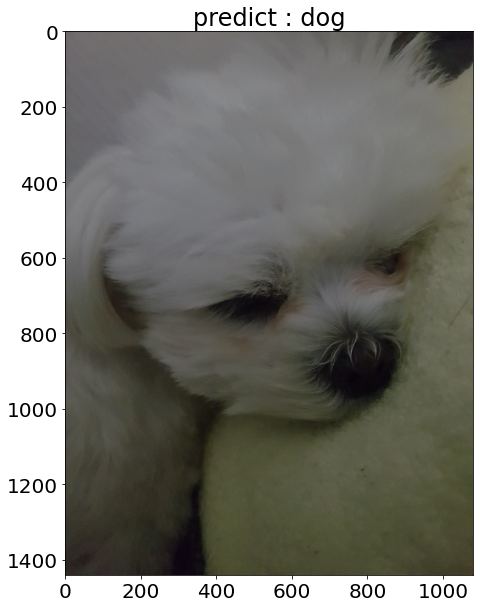

In [32]:
plt.rc('font', size = 20)
# 이미지를 출력 (전체 가로 10, 세로 10)
fig = plt.figure(figsize=(10, 10))
# 예측값 대입
model_out = predict[0]
# 예측값이 1일때
if model_out == 1 :
    # cat 대입
    str_label = "cat"
else :
    # dog 대입
    str_label = 'dog'
# 이미지의 제목으로 예측한 이미지의 이름 출력
plt.title('predict : %s' % str_label)
# 이미지 출력
plt.imshow(image)
# 그래프를 화면에 그림
plt.show()

In [33]:
# 새로 예측할 이미지를 저장할 리스트
new_image1=[]

In [34]:
# 예측할 이미지를 읽어서 image에 저장
# Image.open(예측하고자 하는 이미지 경로)
image1 = Image.open("c:/ai/workspace/mongodb/test02.jpg")
# 컬러이미지를 흑백으로 변환 convert('L') 해서 im에 대입
im1 = image1.convert('L')
# 이미지 파일의 크기를 200x200으로 수정
im1 = im1.resize((IM_WIDTH, IM_HEIGHT))

# 이미지를 2차원 배열로 변환 : np.array(im)
# 2차원 배열을 1차원 배열로 변환 : flatten()
# 이미지 파일에 저장된 RGB 값은 0 ~ 255 사이의 값이 저장되어 있어 255로 나누어 값들을 0 ~ 1사이의 실수로 변환
im1 = np.array(im1).flatten() / 255.0
# im에 저장된 데이터의 타입을 float32로 변환
im1 = im1.astype("float32")
# image에 im을 추가
new_image1.append(im1)

In [35]:
# new_image1를 numpy배열로 변환
new_image1_arr = np.array(new_image1)
new_image1_arr

array([[0.6       , 0.6039216 , 0.6039216 , ..., 0.69411767, 0.69803923,
        0.69803923]], dtype=float32)

In [36]:
# 이미지가 고양이인지 강아지인지 분류
# 고양이 1, 강아지 0
predict1 = SVM.predict(new_image1_arr)
# 분류 결과 조회
predict1[0]

0

In [37]:
import matplotlib.pyplot as plt

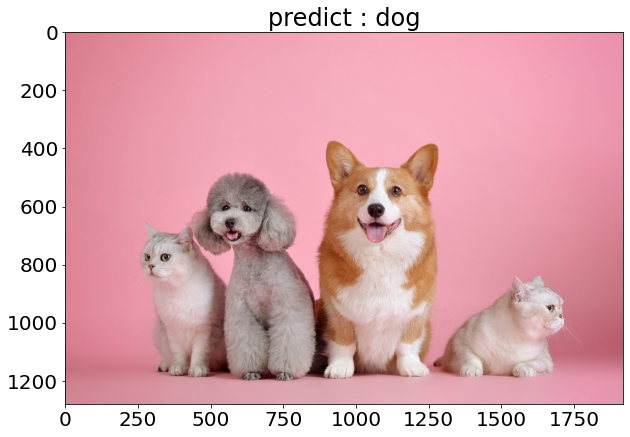

In [38]:
plt.rc('font', size = 20)
# 이미지를 출력 (전체 가로 10, 세로 10)
fig = plt.figure(figsize=(10, 10))
# 예측값 대입
model_out = predict1[0]
# 예측값이 1일때
if model_out == 1 :
    # cat 대입
    str_label = "cat"
else :
    # dog 대입
    str_label = 'dog'
# 이미지의 제목으로 예측한 이미지의 이름 출력
plt.title('predict : %s' % str_label)
# 이미지 출력
plt.imshow(image1)
# 그래프를 화면에 그림
plt.show()

# 수업

In [39]:
from sklearn import svm

In [40]:
# 데이터를 분류하는 40000차원 평면?
# svm.SVC : Support Vector Machine 실행
# X-train -> 0, X-train -> 1 을 나누는 초평면 만듦
svm.SVC().fit(X_train, y_train)

SVC()

In [41]:
svm = svm.SVC().fit(X_train, y_train)

In [42]:
# 분리하는 평면 리턴
svm

SVC()

In [43]:
X_test

array([[0.6117647 , 0.6156863 , 0.6156863 , ..., 0.7764706 , 0.76862746,
        0.7647059 ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.7490196 , 0.74509805, 0.7372549 , ..., 0.49019608, 0.49411765,
        0.49803922],
       ...,
       [0.5019608 , 0.45490196, 0.39607844, ..., 0.73333335, 0.7254902 ,
        0.7372549 ],
       [0.27058825, 0.27058825, 0.26666668, ..., 0.627451  , 0.61960787,
        0.6156863 ],
       [0.89411765, 0.9019608 , 0.8980392 , ..., 0.5137255 , 0.5686275 ,
        0.627451  ]], dtype=float32)

In [44]:
X_test[0:2]

array([[0.6117647 , 0.6156863 , 0.6156863 , ..., 0.7764706 , 0.76862746,
        0.7647059 ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]], dtype=float32)

In [45]:
# 2개만 예측해보자
SVM.predict(X_test[0:2])

array([0, 1])

In [46]:
# 실제 값들... 1개 틀렸네
y_test[0:2]

array([0, 1])

In [47]:
# 다 예측해보자
SVM.predict(X_test)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [48]:
y_test

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,

In [49]:
# 변수에 넣자
p = SVM.predict(X_test)

In [50]:
p

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,

In [51]:
y_test

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,

In [52]:
# 두개를 비교하자
p == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True,  True, False, False, False, False, False,  True,
       False,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True, False, False, False,  True,  True, False,
        True, False,  True, False,  True, False, False, False,  True,
        True,  True,

In [53]:
# 합 계산 : True == 1, False == 0
np.sum([True, False, True, False, True])

3

In [54]:
# True 개수 : 예측과 실제값이 같은 것들의 개수
np.sum(p == y_test)

291

In [55]:
len(p == y_test)

494

In [56]:
# 정확도를 계산해보자
np.sum(p == y_test) / len(p == y_test)

0.5890688259109311

In [57]:
# X_test 로 예측
# 예측값과 실제값을 비교
# 정확도 계산
SVM.score(X_test, y_test)

0.5890688259109311

In [58]:
# 새로 예측할 이미지를 저장할 리스트
new_image1=[]

In [59]:
# 예측할 이미지를 읽어서 image에 저장
# Image.open(예측하고자 하는 이미지 경로)
image1 = Image.open("c:/ai/workspace/mongodb/test03.jpg")
# 컬러이미지를 흑백으로 변환 convert('L') 해서 im에 대입
im = image1.convert('L')
# 이미지 파일의 크기를 200x200으로 수정
im = im.resize((IM_WIDTH, IM_HEIGHT))

# 이미지를 2차원 배열로 변환 : np.array(im)
# 2차원 배열을 1차원 배열로 변환 : flatten()
# 이미지 파일에 저장된 RGB 값은 0 ~ 255 사이의 값이 저장되어 있어 255로 나누어 값들을 0 ~ 1사이의 실수로 변환
im = np.array(im).flatten() / 255.0
# im에 저장된 데이터의 타입을 float32로 변환
im = im.astype("float32")
# image에 im을 추가
new_image1.append(im)

In [60]:
# new_image1를 numpy배열로 변환
new_image1_arr = np.array(new_image1)
new_image1_arr

array([[0.28235295, 0.16470589, 0.30980393, ..., 0.77254903, 0.77254903,
        0.7764706 ]], dtype=float32)

In [61]:
# 이미지가 고양이인지 강아지인지 분류
# 고양이 1, 강아지 0
predict1 = SVM.predict(new_image1_arr)
# 분류 결과 조회
predict1[0]

0

In [62]:
import matplotlib.pyplot as plt

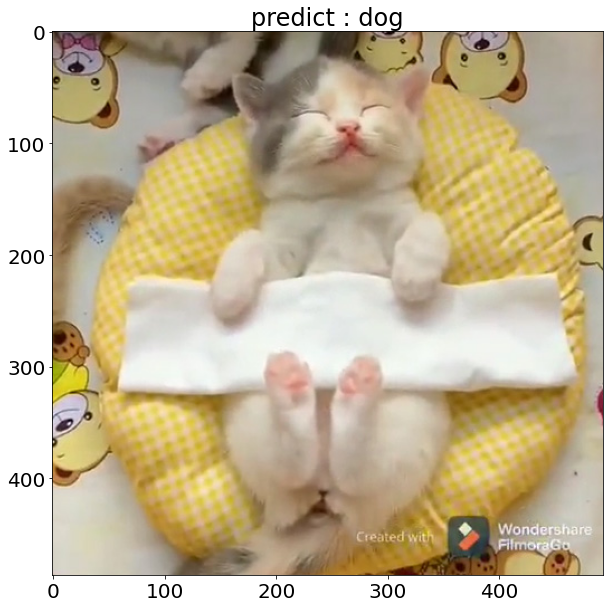

In [63]:
plt.rc('font', size = 20)
# 이미지를 출력 (전체 가로 10, 세로 10)
fig = plt.figure(figsize=(10, 10))
# 예측값 대입
model_out = predict1[0]
# 예측값이 1일때
if model_out == 1 :
    # cat 대입
    str_label = "cat"
else :
    # dog 대입
    str_label = 'dog'
# 이미지의 제목으로 예측한 이미지의 이름 출력
plt.title('predict : %s' % str_label)
# 이미지 출력
plt.imshow(image1)
# 그래프를 화면에 그림
plt.show()

# CNN이용하기

In [88]:
#이미지의 가로 세로
IM_WIDTH = 200
IM_HEIGHT = 200

In [89]:
# 고양이와 개의 이미지를 저장할 리스트
images=[]
# 고양이 0 개 1을 저장할 리스트
labels=[]

In [90]:
import numpy as np

In [91]:
# 강아지와 고양이 이미지중 하나의 정보가 저장된 image_list
for file_detail in image_list:
    try:
        #파일명 조회
        file_name=file_detail["filename"]
        print("file_name:",file_name)
        #파일명이 일치하는 마지막 파일의 내용을 가져올 객체 f 리턴
        f = fs.get_last_version(filename=file_name)
        #파일의 내용을 읽어서 data에 저장
        data=f.read()
        # data에 저장된 값의 개수가 0 초과 일때
        if len(data)>0 :
            #data의 내용을 이미지로 변환해서 im에 저장
            im = Image.open(BytesIO(data))        
            #이미지 파일의 크기를 200x200 으로 수정 
            im = im.resize((IM_WIDTH,IM_HEIGHT))
            #이미지 파일에 저장된 RGB값은 0~255사이의 값이 저장되 있음
            #255로 나눠서 값들을 0~1 사이의 실수로 변환
            im = np.array(im) / 255.0
            #im에 저장된 데이터의 타입을 float32로 변환
            im = im.astype("float32")
            #이미지를 가로 200 세로 200 RGB 이미지로 변환
            im = im.reshape(200,200,3)
            #images에 im을 추가
            images.append(im)
            # file_detail["metadata"]["type"] 에 cat 이 포함되 있으면 1 아니면 0을 label에 저장
            label = 1 if "cat" in file_detail["metadata"]["type"] else 0
            #labels에 label추가
            labels.append(label)
    except :
        # 이미지 처리중 에러가 발생했을때 출력되는 메시지
        print("이미지 처리중 에러 발생")

file_name: IqkSf-vO_Jl1hA9k2SPeu3puo2R4.jpg
file_name: I5moydFuUMwFi3oEOPX959RlIZqY.jpg
file_name: IzCIPzMQrpQjeSKZWsg22yB_-IIo.jpg
file_name: IEsKZxZsl_W-4jcOZ3RRpfDvVBKc.jpg
file_name: I83NJ67RXsHAWWga9wDSmnhAfE98.jpg
file_name: IG79sqb-FJtxWBSNtNymn1-QaJbc.jpg
file_name: IpOX3MIQao76aQ5DO8uSEE3KqAvc.jpg
file_name: mosaakTul0.jpeg
file_name: IR3Ystm-qKc2kqBL3LHe-gfI_KLI.jpg
file_name: IKAGAvCAUDkUL3Ed7_clw-dyRzXI.jpg
file_name: 0000109645_001_20210414160328325.jpg
file_name: Iim65cm5HWXqjZXcxmSgqhWxFTNo.jpg
file_name: I-A0r1LdiJ3yO6c6ldxnBShIDofo.jpg
file_name: I1hoQJPcjdBUwaPKW-Mo7DKRTWKQ.jpg
file_name: 0000050851_001_20210207121759617.jpg
file_name: InMPojw89TUVzGSOxu-cLdP4z9YE.jpg
file_name: It2EXojHG65IVMKt3AUYXXvI8aCk.jpg
file_name: IsCLLxO4nAmF8PZYz7qG1SDs5k6k.jpg
file_name: I3zHrwehDjdZoKPssXEZcB82vo8Y.jpg
file_name: IBjDo1mQMyU7UqQTWiTuA9O_1ZBw.jpg
file_name: INH-dd7aSQJ8LMOJUSoLxN-cd30I.jpg
file_name: 0000100240_001_20210306160159601.png
이미지 처리중 에러 발생
file_name: thumb_9bi8m4

C:\Users\Admin\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


file_name: 5a8fa361a54930af8a765b2679c88b9c.jpg
file_name: 609714_image_1_20210112170035640.jpg
file_name: IGLsMME2tKiXe4D5vNZlfxDJPTHM.jpg
file_name: IP4sawHDuGc-N7KIetB0qoQOm9vM.jpg
file_name: Iqg1oclNNDLAXoksLZBxx3-DejKk.jpg
file_name: 57edb31e5872cce7c81cf901e4ade89a--cute-cats-adorable-animals.jpg
file_name: I3nNx68qbA621Sy6Hv9KvnEkl-Xg.jpg
file_name: I-7WLTcToNOuRlJKj7eBJEe5ol-c.jpg
file_name: I3mkNPmGK5Q8-Ej0t3tStYpynm8Q.jpg
file_name: 10700860015938139_1604904605.jpg
file_name: IUyEcUi9jYsSvAFbQpmseFdMatrU.jpg
file_name: 0000052909_004_20210316163002543.jpg
file_name: IBvse4A08VxJXZn71hImUA6EFMyg.jpg
file_name: 0000041887_001_20200923084942888.jpg
file_name: 20461861653657302_2040364378.jpg
file_name: 15239924701988596_1945492768.jpg
file_name: 26529571884.20210326180434.jpg
file_name: 14191204345868055_1638250179.jpg
file_name: 4pg0m7s_202111694147318283.jpg
file_name: 25695172580.20210121221531.jpg
file_name: 131a55470e6c6ac47d92da0241ed34d2.JPG
file_name: IlbLDO44hHoq-8sN9xv

file_name: 0000046589_001_20201116110222712.jpg
file_name: 56063771.2_59_20130623234402.jpg
file_name: 0000001050_002_20181204154505470.jpg
file_name: IE001734949_STD_99_20140727152902.jpg
file_name: eb78e2d1f9d7d3491fc6439326376e3b--bookshelves-himalayan-cat.jpg
file_name: O1CN01vGqKPm1a0mw5q6s2E_3326773268.jpg
file_name: IjpCq7LEjzjQuqgBPgN9ZFQJKGF0.jpg
file_name: Isu-rnSJZkbmpEzyf_YCyjqsQ_c4.jpg
file_name: 24934519005.20201122022946.jpg
file_name: Iko7C10Tq3oP9n-MTaE4fuyupUdc.jpg
이미지 처리중 에러 발생
file_name: I-g_Mx0mkGa9RChQ4YHQpjrCnf_E.jpg
file_name: IRtJm-vXmn-XCcBQlUlr5TwJryxg.jpg
file_name: ISjoaLDBeON_cEXTaBZGtxVolxCk.jpg
file_name: 0000054553_002_20210414155142433.jpg
file_name: IP8tMPJ4pzIV-5_V2LZ78aXzgF1s.jpg
이미지 처리중 에러 발생
file_name: IrLrR5gRzpCsWUHvogxMa6bm7K8g.jpg
file_name: Ib8PaX0koMG7rAs5pe4mTirWKu0M.jpg
file_name: ILCKNnEnwXXO3HedfuFB_OCwlrqc.jpg
file_name: InDSp1BOCDGsuTCYUvKfMJEmU-Uw.jpg
file_name: mosaqQxZGu.jpeg
file_name: 0000133407_001_20210423135402161.jpg
file_name

file_name: 0000000516_002_20170929171807164.jpg
file_name: a8bc9b9e0b8b0255c8bbf350cdde005b.jpg
file_name: 198126_image_5_99_20141126160003.jpg
file_name: 0000033222_001_20200710113829286.jpg
file_name: 0000721640_001_20201023194711841.jpg
file_name: f8c5c37033408edff135bf3013a6ce08.jpg
file_name: 145c548d5db8121a7a5bfbbda0caee39--baby-cubs-off-of.jpg
file_name: SSI_20130915144939_V_59_20130915145703.jpg
file_name: mug_obj_137982593664254880.jpg
file_name: 1c24f57573970965184622dfa1471803.jpg
file_name: IARwGTRep0z4AojdAe5qjcCrcM5E.jpg
file_name: 0000466150_001_20200821120027060.jpg
file_name: 6b9e243dc4b2f413dd461e5d4dbe33d2.jpg
file_name: 0000038582_001_20200826083904528.jpg
file_name: Iz62ewy5AGHWInmMREMnTeC2GKRg.jpg
file_name: I1gwRhC0nTBc4E5IYG1Z4X_CxxvQ.jpg
file_name: INM4SMcJsyYofR854jMEyudcKsRw.jpg
file_name: 333015484f098ba76bdbd5c3f3c206b2.jpg
file_name: NISI20081116_0000268013_web.jpg
file_name: 0000000273_002_20170904144451764.jpg
file_name: IuJQ_zoxO6hNkw6xc602kE-hD_bk.jpg

file_name: 0000035516_001_20200731110641200.jpg
file_name: 0000004167_003_20190117110957080.png
이미지 처리중 에러 발생
file_name: viewimage.php
file_name: 0000019177_001_20200308135232198.jpg
file_name: mug_obj_140849800776566133.jpg
file_name: 0000035120_001_20200728140440426.jpg
file_name: download.jsp
file_name: 0000023801_001_20200409100046077.jpg
file_name: 25810957266.20210131211730.jpg
file_name: 7uc4b9v_20213514554772485.jpg
file_name: 0000001261_002_20180115145001847.jpg
file_name: IzfXBwjLROjNifG0tTmD6U_Dq8Ok.jpg
file_name: 601ed796bff957758110a474c71fae7c--maine-coon-kittens-blue-eyes.jpg
file_name: 14264234516CCDF40E1671
file_name: 20170314140720-PmlTRHpuvFIoQoRP1l8E0-v4
file_name: 0000032610_001_20200703082630375.jpg
file_name: b9f0705c1c227e0aef8a30a6e5f7eb0a--orange-kittens-white-kittens.jpg
file_name: 0000001110_001_20171221152550443.jpg
file_name: 0000003490_003_20181031174645695.jpg
file_name: I5YV1hKdqMrkAX5QhX0PGhRnYBkc.jpg
file_name: 0000041175_001_20200917111907806.jpg
fil

file_name: IRP3Awg1qXCT7zdMA2sbXyqoy6GY.jpg
file_name: 35364400761671725_1059666365.jpg
file_name: IPMECZVQEN4pHWGNTEwuKtCTl-Xo.jpg
file_name: 0003067316_001_20210402225630508.jpg
file_name: 19958559753867812_1830312672.jpg
file_name: mosad1CQNt.jpeg
file_name: 15881780973285537_1382356815.png
이미지 처리중 에러 발생
file_name: IM3TwMTdmmTufPsJ1tSQP-Y4ItJQ.jpg
file_name: 15362522241176453_1178267315.jpg
file_name: mosa2PaASX.jpeg
file_name: IRINldogyP8kaVIchhFaAgod-2mo.jpg
file_name: Idk84hWVEoDeA2L21XIHVh0IsMpc.jpg
file_name: AKR20210305124000009_03_i_P4_20210305160925413.jpg
file_name: 12807602457248863_1741421324.PNG
이미지 처리중 에러 발생
file_name: IJJfWmwGLyY4DbIdHWZJ35cN4dhU.jpg
file_name: 18583696770167255_106981023.jpg
file_name: 128160_2.jpg
file_name: 26368427316.20210315175640.jpg
file_name: 20041567741068409_135851916.jpg
file_name: 20160577855081641_624903455.jpg
file_name: IP_q5t0uhfqupaTJx-r9Dvjst5As.jpg
file_name: IJD5uJrUbM4NLz0Vj8nweB6NE4RE.jpg
file_name: ISj9nw46m3S7ZWsUXXbBrc7VmOQo.j

file_name: 0000041319_001_20200918083707719.jpg
file_name: 0000004145_004_20190115165355674.jpg
file_name: 1756312665_35lBrNJp_MVIMG_20180926_160556.jpg
file_name: 05a2702e72e95784ddc3377254616ab1--cuddle-buddy-cute-kittens.jpg
file_name: IMdWZn1UCTY9_TymjFnaCCy-sPzw.jpg
file_name: 375121f080419a2addf2fcbd9c52f0ab--cute-kittens-cutest-kittens-ever.jpg
file_name: 0000001698_001_20180316152225883.jpg
file_name: 1557545000_13983100.jpg
file_name: FOREIGN201509020816000348435362880_99_20150902092936.jpg
file_name: 57e4d48750989bf618720620a0b54992.jpg
file_name: 24074219220.20200908004901.jpg
file_name: 0000023810_001_20200409100644500.jpg
file_name: afbabe043bef4aa31661ffa3fb68b886--tuna-play.jpg
file_name: IlfowNVWa8FwR5_oehGQ5uGAmGM4.jpg
file_name: ccd3ede75efdc43837b7c46c0d7c1980--siamese-cats-cat-illustrations.jpg
file_name: 0002230120_003_20190613120905741.jpg
file_name: mug_obj_140049936948533836.jpg
file_name: Iues3jYWaYxNm46FelA97mlIzBfM.jpg
file_name: 0000025296_001_20200421133450

file_name: 2_resize.jpg
file_name: f04980630b7aa10cfd424661f20c98ac--dog-care-tips-animal-instinct.jpg
file_name: 5bf90718cbae00edf9f45925d2a672b6.jpg
file_name: 20585746029068355_1670965855.jpg
file_name: 12773781892896628_280826461.JPG
file_name: 0000053440_001_20210325164100603.jpg
file_name: 0000032121_001_20200626112825836.jpg
file_name: 13911724168077778_961192944.jpg
file_name: 0000029977_001_20200604170612948.jpg
file_name: 0000036646_001_20200810075446069.jpg
file_name: 0000030149_001_20200606122013791.jpg
file_name: 0000045695_001_20201103094853529.jpg
file_name: 0000041329_001_20200918091708394.jpg
file_name: 0000046777_001_20201120134455783.jpg
file_name: 7rt4i9x_202142813435328457.jpg
file_name: 0000035486_001_20200731104242671.jpg
file_name: 0000050058_001_20210123131346840.jpg
file_name: 0000038931_001_20200828110654400.jpg
file_name: 0000039160_001_20200829153258245.jpg
file_name: 0000047476_001_20201203150315486.jpg
file_name: mug_obj_138604728529680249.jpg
file_name: 

file_name: 26310600690.20210310234506.jpg
file_name: 20332700727258961_822655445.JPG
file_name: 0000050762_001_20210205110538430.jpg
file_name: 26901808923.20210424181600.jpg
file_name: 0000032136_001_20200626114022963.jpg
file_name: 0000723516_001_20210309100621335.jpg
file_name: 0000028423_001_20200518172404676.jpg
file_name: IVkV0tlqkyNUhneaMSDub3h0Pik0.jpg
file_name: I6bhJ2xefC1mn7dtT52iT5R2DKHI.jpg
file_name: 0000055002_001_20210421144111766.jpg
file_name: 26109925010.20210223215320.jpg
file_name: 14801995488443883_1806946075.jpg
file_name: 0000047450_001_20201202163334845.jpg
file_name: 0000049700_001_20210117141700999.jpg
file_name: 0000050207_001_20210126131542361.jpg
file_name: IOQ_ZwbbckJSI1V7Gr0DmWEBzWBs.jpg
file_name: 0000048377_001_20201218144555277.jpg
file_name: IHjlmCJpePFwqPwF5ETPG2guAIV8.jpg
file_name: 0000051246_001_20210215081736536.jpg
file_name: 0000049953_001_20210121125443038.jpg
file_name: 0000046833_001_20201120160617105.jpg
file_name: 21009437314229357_114739

file_name: 0000013079_001_20200205103624941.jpg
file_name: 0000000240_001_20171205111301668.png
이미지 처리중 에러 발생
file_name: IOzPjVdmJon9qYSGPKhhxYGePaN4.jpg
file_name: 0000019275_001_20200310084636601.jpg
file_name: 0000029386_001_20200529150412805.jpg
file_name: 0000040379_001_20200910131502838.jpg
file_name: 0000047950_001_20201210112911807.jpg
file_name: 0000010397_001_20200121110820505.jpg
file_name: 0000028105_001_20200515161206397.jpg
file_name: 39848_detail_2807.jpg
file_name: 2c6207c087208df0734fb2c11042c3f5--lets-go-west-highland.jpg
file_name: I_XibQxx4aW-CI_Q7yWDSgJ-zdbI.jpg
file_name: 0000022612_001_20200401140443406.jpg
file_name: 0000033083_001_20200709091029215.jpg
file_name: IEnAfYe4s77Rqrk38KGQt3ICYRIs.jpg
file_name: 0000033929_001_20200718122234904.jpg
file_name: 0000030637_001_20200611085216390.jpg
file_name: I5V9Z9uOcjhh_JXY4M4s3qwxacYg.jpg
file_name: 0000045078_001_20201027103454323.jpg
file_name: IAzbiLQC7TsMxVTKcSmyqtKty-Mg.jpg
file_name: e0ab264cb2dc74ab94e69b8eb1e

file_name: 0000126037_001_20200612090423661.jpg
file_name: 0000042895_001_20201002105646354.jpg
file_name: ITFLn5Wxr58OYY3X6UkGr4bTDSSA.jpg
file_name: 0000016659_001_20200223125428826.jpg
file_name: 0000040324_001_20200910111702256.jpg
file_name: NISI20150529_0010995559_web_99_20150529194719.jpg
file_name: 0000002582_001_20180710092327399.jpg
file_name: I9W475JALGf1NhHrsOYACIw5C12c.jpg
file_name: 0000043024_001_20201005080029093.jpg
file_name: 55590906d654b835b3e32234803ee059--pj-party-porsche.jpg
file_name: 0000034928_001_20200727091842287.jpg
file_name: 22882_detail_31961511284662.jpg
file_name: T2BtwNXhRaXXXXXXXX_49061127.jpg_1200x1200.jpg
file_name: 0000027192_001_20200508172656707.jpg
file_name: 0000044573_001_20201022112428527.jpg
file_name: I0rZLkCFcRz_9uHRJiW_kccPBAUw.jpg
file_name: 1549505730_30119900.jpg
file_name: 0000026735_001_20200504162053672.jpg
file_name: 32873_detail_34131493021128.jpg
file_name: 0000012016_001_20200130121424479.jpg
file_name: 0000032235_001_202006271

file_name: I1CPwYFdoAGN5YYctpgr_wNtVsD0.jpg
file_name: 877_detail_84971486311342.jpg
file_name: 84f72717c47bdab52958763ebaf53360--french-dogs-french-bulldog-puppies.jpg
file_name: download.jsp
file_name: cd44f003555cf79a490f9561705ac80c.jpg
file_name: 0000050291_007_20210129114001429.jpg
file_name: 0004789638_003_20200801153424190.jpg
file_name: 23993_detail_26681507948238.jpg
file_name: Ib6jhofXwR3sQfJts1RrP7FXMqio.jpg
file_name: I5ctmufilBgfHH0lZo1CgQqJEEGw.jpg
file_name: 23020_detail_14401536648928.jpg
file_name: 4283_detail_6208.jpg
file_name: ITmbOXbJNb3qh_8nLf2Khc3Mlt3s.jpg
file_name: 1549603211_82595600.jpg
file_name: 20186196013573789_1379346390.jpg
file_name: 24042444286.20200904173033.jpg
file_name: IhTgnEUbKDTHXqCssJA-rJCSdBAA.jpg
file_name: 307cfe1f55b96476d18612c4aff40df7--san-bernardo-bernard-dog.jpg
file_name: dfda2de51bd7a5062e7deef49d64ae68--dog-haircuts-maltese-haircut-hairstyles.jpg
file_name: 85a1ba769521e0184ed2b15e83c58a53--little-dogs-gentleman.jpg
file_name: 000

file_name: IPJmlzi36SwByb_a7fOsEs0RyYh4.jpg
file_name: Ir1vQTv5kgGdvny84kyDIsPqGr9c.jpg
file_name: 10483_detail_98441486425994.jpg
file_name: I-4o1pgl4bdIw2fR4hUwHw6zLPDM.jpg
file_name: IsAWKaDFJDqtpoY-q_f02f4lyiBw.jpg


In [92]:
# 리스트인 images 를 numpy 배열로 변환 해서 images_arr 에 대입
images_arr=np.array(images)
images_arr

array([[[[0.7529412 , 0.7058824 , 0.6431373 ],
         [0.75686276, 0.70980394, 0.64705884],
         [0.7529412 , 0.7058824 , 0.6431373 ],
         ...,
         [0.50980395, 0.46666667, 0.45882353],
         [0.49803922, 0.45490196, 0.44705883],
         [0.49803922, 0.45490196, 0.4509804 ]],

        [[0.7529412 , 0.7058824 , 0.6431373 ],
         [0.75686276, 0.70980394, 0.64705884],
         [0.7490196 , 0.7019608 , 0.6392157 ],
         ...,
         [0.5058824 , 0.4627451 , 0.4627451 ],
         [0.5058824 , 0.45882353, 0.45882353],
         [0.5019608 , 0.45490196, 0.45490196]],

        [[0.75686276, 0.70980394, 0.64705884],
         [0.7490196 , 0.7019608 , 0.6392157 ],
         [0.74509805, 0.69803923, 0.63529414],
         ...,
         [0.5019608 , 0.45490196, 0.4627451 ],
         [0.49803922, 0.4509804 , 0.45882353],
         [0.49803922, 0.4509804 , 0.45882353]],

        ...,

        [[0.92156863, 0.9137255 , 0.8627451 ],
         [0.92941177, 0.92156863, 0.87058824]

In [93]:
# 리스트 labels 를 numpy 배열로 변환해서 labels_arr 대입
labels_arr=np.array(labels)

In [94]:
images_arr

array([[[[0.7529412 , 0.7058824 , 0.6431373 ],
         [0.75686276, 0.70980394, 0.64705884],
         [0.7529412 , 0.7058824 , 0.6431373 ],
         ...,
         [0.50980395, 0.46666667, 0.45882353],
         [0.49803922, 0.45490196, 0.44705883],
         [0.49803922, 0.45490196, 0.4509804 ]],

        [[0.7529412 , 0.7058824 , 0.6431373 ],
         [0.75686276, 0.70980394, 0.64705884],
         [0.7490196 , 0.7019608 , 0.6392157 ],
         ...,
         [0.5058824 , 0.4627451 , 0.4627451 ],
         [0.5058824 , 0.45882353, 0.45882353],
         [0.5019608 , 0.45490196, 0.45490196]],

        [[0.75686276, 0.70980394, 0.64705884],
         [0.7490196 , 0.7019608 , 0.6392157 ],
         [0.74509805, 0.69803923, 0.63529414],
         ...,
         [0.5019608 , 0.45490196, 0.4627451 ],
         [0.49803922, 0.4509804 , 0.45882353],
         [0.49803922, 0.4509804 , 0.45882353]],

        ...,

        [[0.92156863, 0.9137255 , 0.8627451 ],
         [0.92941177, 0.92156863, 0.87058824]

In [95]:
#images_arr 배열의 모양을 조회
# 가로 200, 세로 200 RGB (3) 
# 인 이미지들이 저장되 있음
images_arr.shape

(1918, 200, 200, 3)

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [97]:
from tensorflow.keras.applications.resnet import ResNet50

#CNN 구조중 하나인 Resnet50 구조를 갖는 Model생성
conv_layers = ResNet50(weights='imagenet', include_top=False, input_shape=(IM_WIDTH, IM_HEIGHT, 3))

In [98]:
#Resnet50 구조 조회
conv_layers.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [67]:
#입력값을 읽어서 예측을 할 Sequential 객체 생성
model = Sequential()

In [68]:
#Resnet50 대입
model.add(conv_layers)

In [69]:
#선형 회귀를 하기 위해서 합성곱 연산을 수행한 결과를 1차원 배열로 변환
model.add(Flatten())

In [70]:
#전체에서 임의로 선택한 weight중 50%는 기울기를 수정하지 않음
model.add(Dropout(0.5))

In [71]:
#Dense : 선형 회귀를 수행할 객체
#Dense(출력데이터의 칸의수) : 출력 데이터는 수는 1024 이
#Dense(1024)  
# activation="relu" :선형 회귀 후 relu 활성 함수 사용
#model.add(Dense(1024, activation='relu')) :Dense 모델을 예측 할 수 있도록 model에 추가
model.add(Dense(1024, activation='relu'))

In [72]:
#전체에서 임의로 선택한 weight중 50%는 기울기를 수정하지 않음
model.add(Dropout(0.5))

In [73]:
#Dense : 선형 회귀를 수행할 객체
#Dense(출력데이터의 칸의수) : 출력 데이터는 512 이므로
#Dense(512)  
# activation="relu" :선형 회귀 후 relu 활성 함수 사용
#model.add(Dense(512, activation='relu')) :Dense 모델을 예측 할 수 있도록 model에 추가
model.add(Dense(512, activation='relu'))

In [74]:
#전체에서 임의로 선택한 weight중 50%는 기울기를 수정하지 않음
model.add(Dropout(0.5))

In [75]:
#Dense : 선형 회귀를 수행할 객체
#Dense(출력데이터의 칸의수) : 출력 데이터 칸의 수는 1이므로
#Dense(1)

#Dense(1) : 선형 회귀를 할 객체를 생성  출력 칸수는 1
    
# activation="sigmoid" :선형 회귀 후 sigmoid 함수를 활성 함수를 이용해서 0~1사이 값을 리턴  
    
    
#model.add(Dense(1, activation="sigmoid")):Dense 모델을 예측 할 수 있도록 model에 추가
model.add(Dense(1, activation='sigmoid'))

In [76]:
#생성된 모델 정보 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dropout (Dropout)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              102761472 
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0

In [77]:
# binary_crossentropy : 0과 1중에 정확도를 계산
#Adam(lr=1e-4) : Adam optimizer 사용
# metrics=['acc'] : 학습시 정확도를 출력
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=1e-4),metrics=['acc'])

In [78]:
X_train.shape

(1481, 40000)

In [79]:
y_train

array([1, 0, 1, ..., 0, 0, 0])

In [80]:
#model.fit(X_train, y_train, epochs=30) 
#             X_train, y_train을 30번 반복해서 개와 고양이를 분리하는 기준을 학습
                                       
model.fit(X_train ,y_train, epochs=30)

Epoch 1/30


ValueError: in user code:

    C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:271 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer sequential: expected shape=(None, 200, 200, 3), found shape=(None, 40000)


In [ ]:
#전체에서 임의로 선택한 weight중 50%는 기울기를 수정하지 않음
model.add(Dropout(0.5))